In [49]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
train_data = pd.read_csv('train_iris.csv')
X_train = train_data.drop(['species', 'Unnamed: 0'], axis=1)
y_train = train_data.species
assert(len(X_train)==len(y_train))

In [3]:
test_data = pd.read_csv('test_iris.csv')
X_test = test_data.drop(['species', 'Unnamed: 0'], axis=1)
y_test = test_data.species
assert(len(X_test)==len(y_test))

In [50]:
train_score = []
accuracy_score = []
mean_cv_score = []
depthes = []
depthes.extend(range(1, 101))
np.random.seed(0)

In [51]:
for i in depthes:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    cv_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf.fit(X_train, y_train)
    mean_cv_score.append(cross_val_score(cv_clf, X_train, y_train, cv=5).mean())
    train_score.append(clf.score(X_train, y_train))
    accuracy_score.append(clf.score(X_test, y_test))

In [52]:
# pd.DataFrame(columns=["train_score", "test_score"], data=[train_score, accuracy_score])
score_df = pd.DataFrame({"max_depth" : depthes, "train_score": train_score, "mean_cv_score": mean_cv_score, "test_score": accuracy_score})

<AxesSubplot:xlabel='max_depth', ylabel='score'>

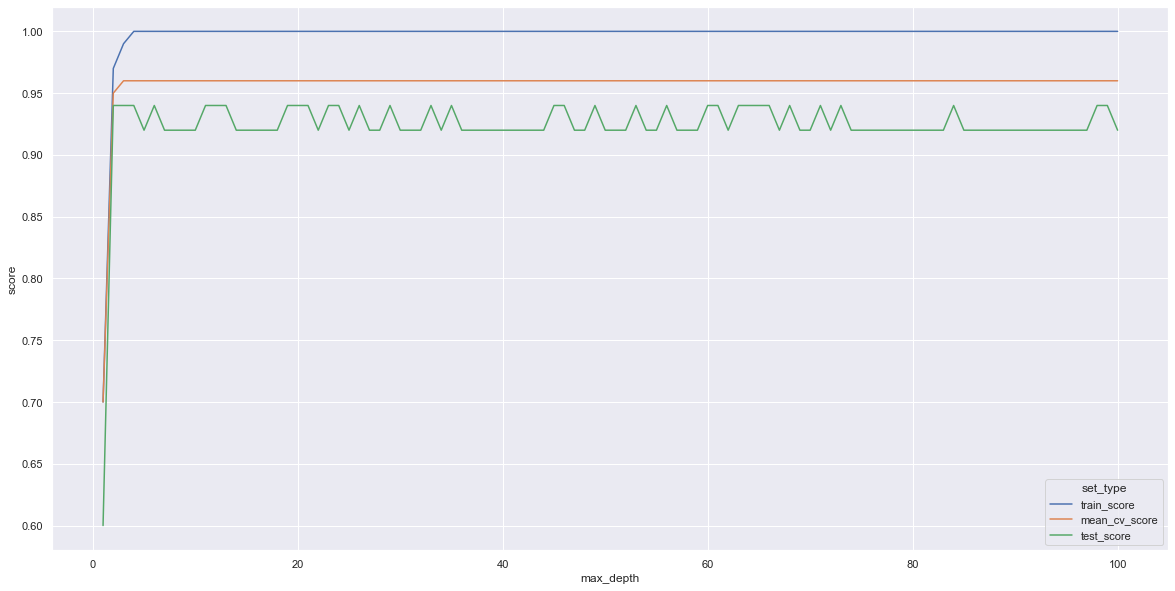

In [53]:
# Видоизменим DataFrame, применив метод melt()
scores_iris_data_long = pd.melt(score_df, id_vars=['max_depth'],
                           value_vars=['train_score',"mean_cv_score", 'test_score'],
                           var_name='set_type', value_name='score')

# Визуализация
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_iris_data_long)